In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Lung Cancer Dataset.csv')
data.columns

Index(['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
       'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL',
       'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
       'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE',
       'PULMONARY_DISEASE'],
      dtype='object')

In [3]:
X = data.drop('PULMONARY_DISEASE', axis=1)
y = data['PULMONARY_DISEASE'].map({'NO': 0, 'YES': 1})

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## SMOTE 

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Random Forest Classifier


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [10]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=5)
calibrated_model.fit(X_resampled, y_resampled)

CalibratedClassifierCV(cv=5,
                       estimator=RandomForestClassifier(class_weight='balanced',
                                                        max_depth=10,
                                                        n_estimators=200,
                                                        random_state=42),
                       method='isotonic')

In [11]:
# 7. Evaluate the Model
y_pred = calibrated_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       593
           1       0.85      0.89      0.87       407

    accuracy                           0.89      1000
   macro avg       0.88      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

Confusion Matrix:
[[527  66]
 [ 45 362]]


In [12]:
probs = calibrated_model.predict_proba(X_test)
preds = calibrated_model.predict(X_test)
for i in range(5):
    print(f"Predicted Class: {preds[i]} | Probability of Disease: {probs[i][1]:.2f}")

Predicted Class: 0 | Probability of Disease: 0.10
Predicted Class: 1 | Probability of Disease: 0.90
Predicted Class: 1 | Probability of Disease: 0.93
Predicted Class: 0 | Probability of Disease: 0.09
Predicted Class: 1 | Probability of Disease: 0.93


 99%|===================| 1986/2000 [01:20<00:00]        

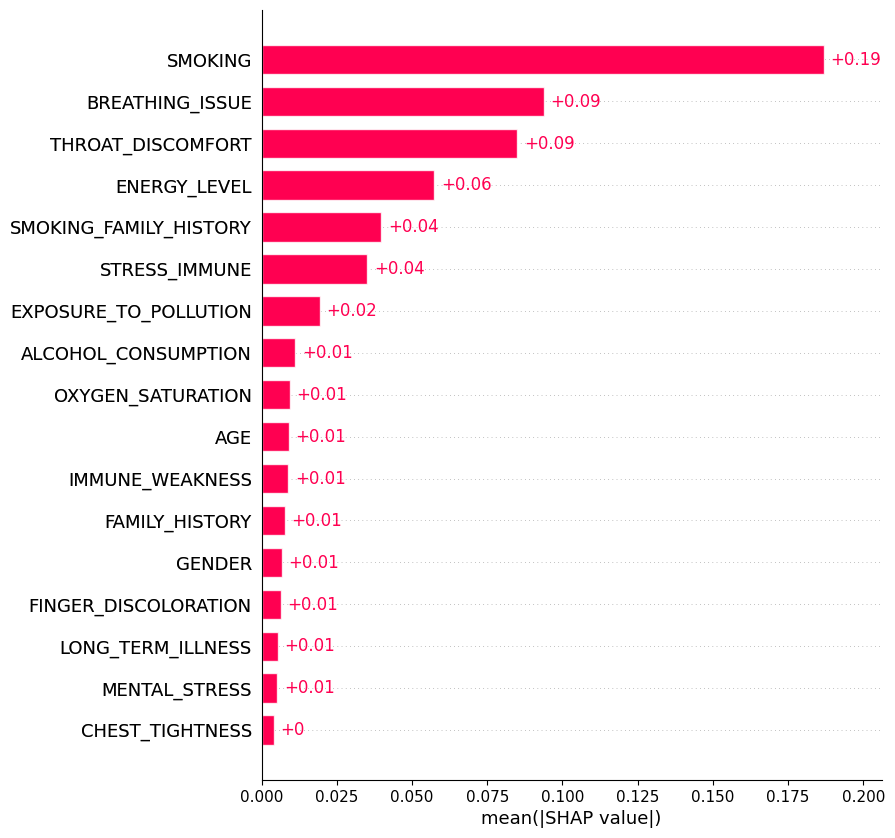

In [13]:
import shap


X_test_df = pd.DataFrame(X_test, columns=X.columns)

explainer = shap.Explainer(model, X_test_df)

shap_values = explainer(X_test_df)

shap_values_class1 = shap_values[:, :, 1]

shap.plots.bar(shap_values_class1, max_display=17)


In [14]:
import joblib

In [15]:
joblib.dump(model, 'backend/model/random_forest_model.pkl')
joblib.dump(calibrated_model, 'backend/model/calibrated_model.pkl')

['backend/model/calibrated_model.pkl']

In [16]:
joblib.dump(explainer, 'backend/model/shap_explainer.pkl')



['backend/model/shap_explainer.pkl']

In [17]:
joblib.dump(X.columns.tolist(), 'backend/model/feature_columns.pkl')

['backend/model/feature_columns.pkl']